### A. Readme First
- Apabila kalian pengguna Ubuntu dari versi 14.04 hingga latest version, kalian bisa langsung menjalankan `Cell` &#8594; `Run All`.
- Apabila kalian bukan salah satu pengguna Ubuntu versi 14.04 hingga latest version, diharapkan untuk mengunduh dan mengekstrasi `Tugas Lab 5 - Images` dan melakukan ekstrasi hasilnya tepat di sebelah `MRS-Lab 5-A-2006609645-A-2006560876.ipynb` lalu menjalankan `Cell` &#8594; `Run All`.

### B. Persiapan Lingkungan Laboratorium
- Melakukan _install package_/_dependency_ yang diperlukan untuk `Tugas Laboratorium 5` kali ini.
- Melakukan _import library_ yang akan digunakan pada `Tugas Laboratorium 5` kali ini.
- Mengunduh dan mengekstrasi dokumen pendukung untuk tugas ini.

#### 1. Instalasi _Package_/_Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [1]:
pip install numpy scikit-image matplotlib gdown scipy 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### 2. Melakukan _Import Library_ 

In [3]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
from skimage.morphology import closing, disk, dilation, erosion, opening
from skimage.morphology import black_tophat, white_tophat
from scipy import fftpack as fp
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import sys

#### 3. Unduh dan Ekstrasi Dokumen Pendukung

In [4]:
os.system('gdown https://drive.google.com/uc?id=1WxsZSMSJjijwwogsIzQxp93xEZFPw0zQ')
os.system('unzip Tugas\ Lab\ 5\ -\ Images.zip')

0

### C. Soal 

1. **[30] Image Histogram** \
Diberikan dua ubah kelas citra yaitu kelas naga api (_fire dragon_) dan juga naga air (_water dragon_) dari masing-masing 5 citra untuk kedua kelas:
![fire_dragon_1.jpg](Tugas%20Lab%205%20-%20Images/fire_dragon/1.jpg)
![water_dragon_1.jpg](Tugas%20Lab%205%20-%20Images/water_dragon/2.jpg)
Lakukan pengklasifikasian kedua buah citra sesuai dengan kelas yang bersesuaian dengan menggunakan fitur berdasarkan image histogramnya.
    - [20] Buatlah method predict yang menerima parameter $\text{nama_file}$ dan mengembalikan output $\text{fire_dragon}$ untuk citra yang tergolong sebagai naga air. Method predict yang dibuat **wajib** menggunakan fitur berupa image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus diautomasi, tidak boleh di-hardcode untuk tiap citra.
    - [10] Jelaskan fitur yang telah Anda buat pada bagian pertama dan alasan Anda memilih fitur tersebut!

##### a. Membuat method predict 

In [18]:
basePath = 'Tugas Lab 5 - Images/'
def getPath(fileName, basePath=basePath):
    return basePath + fileName

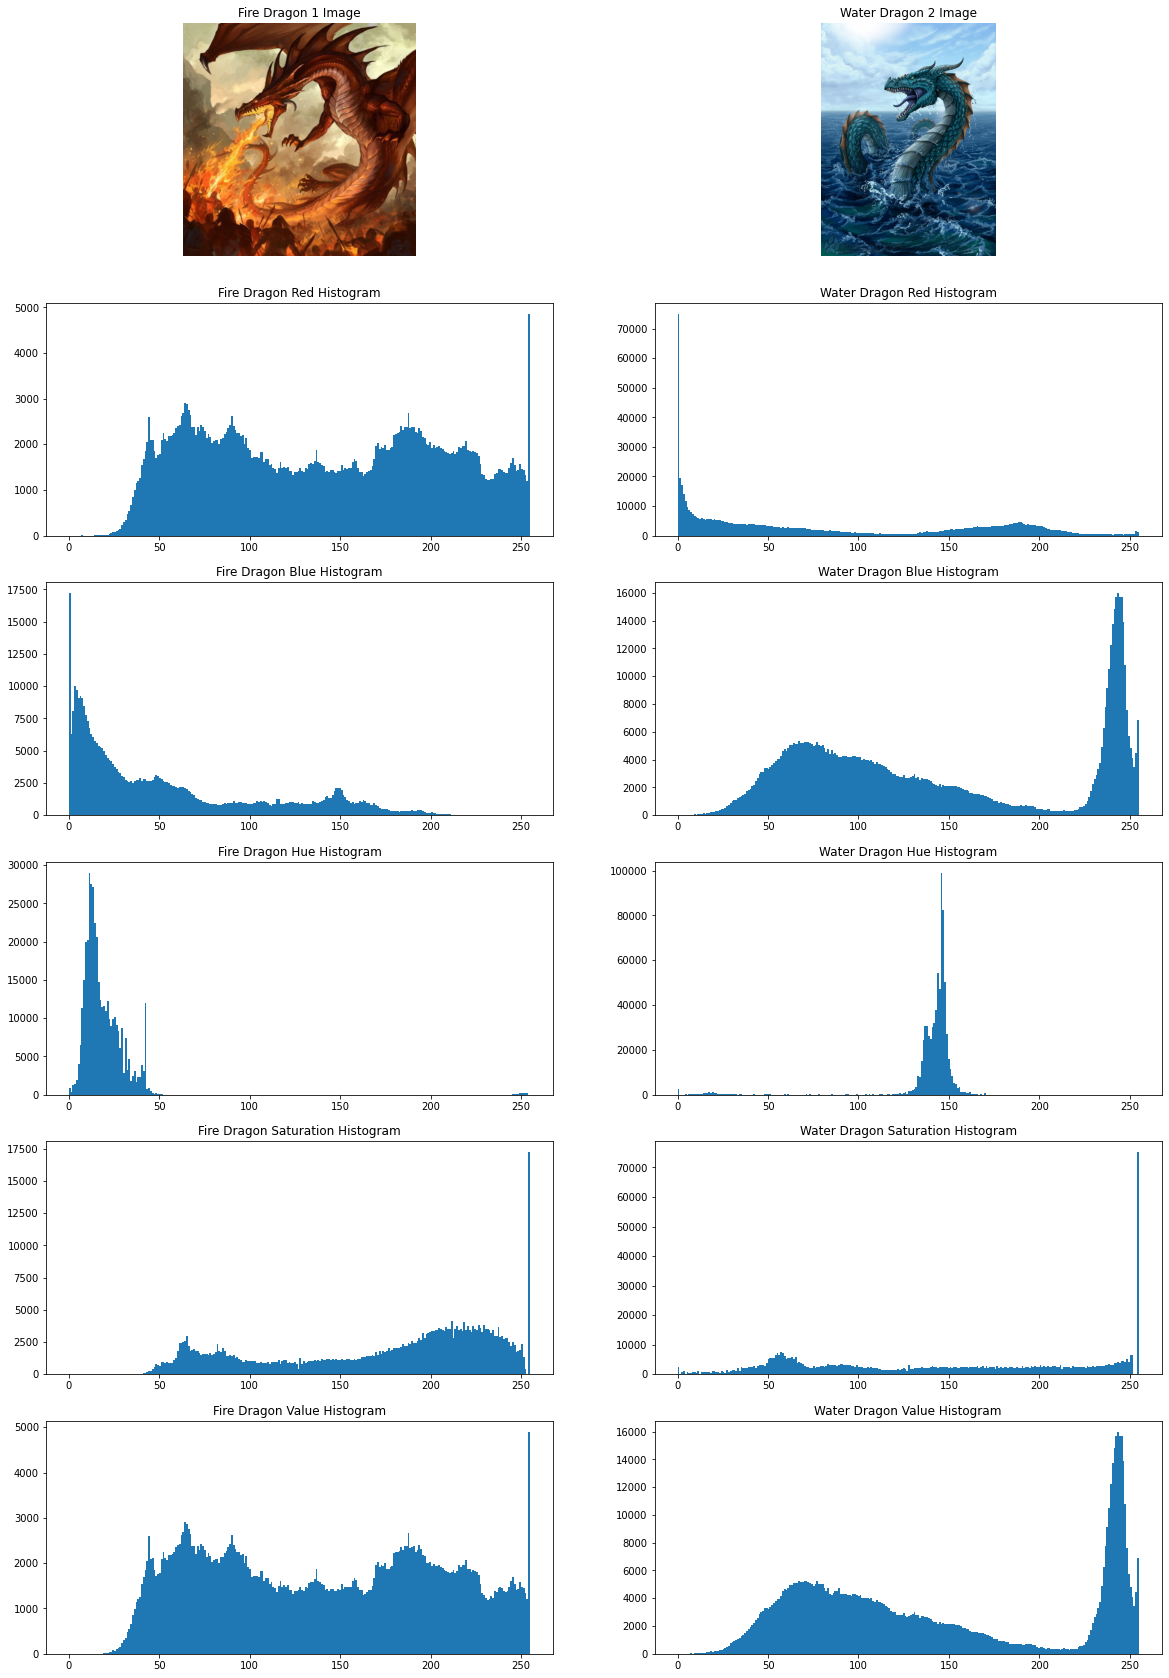

In [175]:
## Menggali insight dari citra
fire_dragon = util.img_as_ubyte(io.imread(getPath('fire_dragon/3.jpg')))
water_dragon = util.img_as_ubyte(io.imread(getPath('water_dragon/5.jpg')))

fire_dragon_R = fire_dragon[:,:,0]
fire_dragon_B = fire_dragon[:,:,2]

water_dragon_R = water_dragon[:,:,0]
water_dragon_B = water_dragon[:,:,2]

fire_dragon_HSV = util.img_as_ubyte(color.rgb2hsv(fire_dragon))
fire_dragon_H = fire_dragon_HSV[:,:,0]
fire_dragon_S = fire_dragon_HSV[:,:,1]
fire_dragon_V = fire_dragon_HSV[:,:,2]

water_dragon_HSV = util.img_as_ubyte(color.rgb2hsv(water_dragon))
water_dragon_H = water_dragon_HSV[:,:,0]
water_dragon_S = water_dragon_HSV[:,:,1]
water_dragon_V = water_dragon_HSV[:,:,2]

## Show image
plt.figure(figsize=(20,30))
plt.subplot(6, 2, 1)
plt.title('Fire Dragon 1 Image')
plt.imshow(fire_dragon)
plt.axis('off')

plt.subplot(6, 2, 2)
plt.title('Water Dragon 2 Image')
plt.imshow(water_dragon)
plt.axis('off')

plt.subplot(6, 2, 3)
plt.title('Fire Dragon Red Histogram')
plt.hist(fire_dragon_R.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 4)
plt.title('Water Dragon Red Histogram')
plt.hist(water_dragon_R.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 5)
plt.title('Fire Dragon Blue Histogram')
plt.hist(fire_dragon_B.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 6)
plt.title('Water Dragon Blue Histogram')
plt.hist(water_dragon_B.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 7)
plt.title('Fire Dragon Hue Histogram')
plt.hist(fire_dragon_H.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 8)
plt.title('Water Dragon Hue Histogram')
plt.hist(water_dragon_H.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 9)
plt.title('Fire Dragon Saturation Histogram')
plt.hist(fire_dragon_S.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 10)
plt.title('Water Dragon Saturation Histogram')
plt.hist(water_dragon_S.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 11)
plt.title('Fire Dragon Value Histogram')
plt.hist(fire_dragon_V.flatten(), 256, range=(0,255))

plt.subplot(6, 2, 12)
plt.title('Water Dragon Value Histogram')
plt.hist(water_dragon_V.flatten(), 256, range=(0,255))

plt.show()

In [176]:
def freq_img(img):
    tmp = [x for x in np.bincount(img.flatten())]
    while len(tmp) < 256:
        tmp.append(0)
    return tmp

## Method predict yang akan digunakan
def predict_dragon_type(file_location, basePath=basePath):
    img = util.img_as_ubyte(io.imread(getPath(file_location, basePath=basePath)))
    img_HSV = util.img_as_ubyte(color.rgb2hsv(img))
    freq_H = freq_img(img_HSV[:,:,0])

    ## Bagi Dua Region
    ## Red = 0 85
    ## Blue = 86 170
    
    ## Region Merah
    freq_red_region = sum(freq_H[:86])
    freq_blue_region = sum(freq_H[86:171])

    ## Show image
    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)
    plt.title('Citra')
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.title('Citra Hue Histogram')
    plt.hist(img_HSV[:,:,0].flatten(), 256, range=(0,255))
    
    plt.show()
    
    ## Lebih banyak intensitas rendah, prediksi sebagai malam
    res = int(freq_red_region > freq_blue_region)
    return ['water_dragon', 'fire_dragon'][res]

Masukkan path file (e.g.: water_dragon/2.jpg): water_dragon/2.jpg


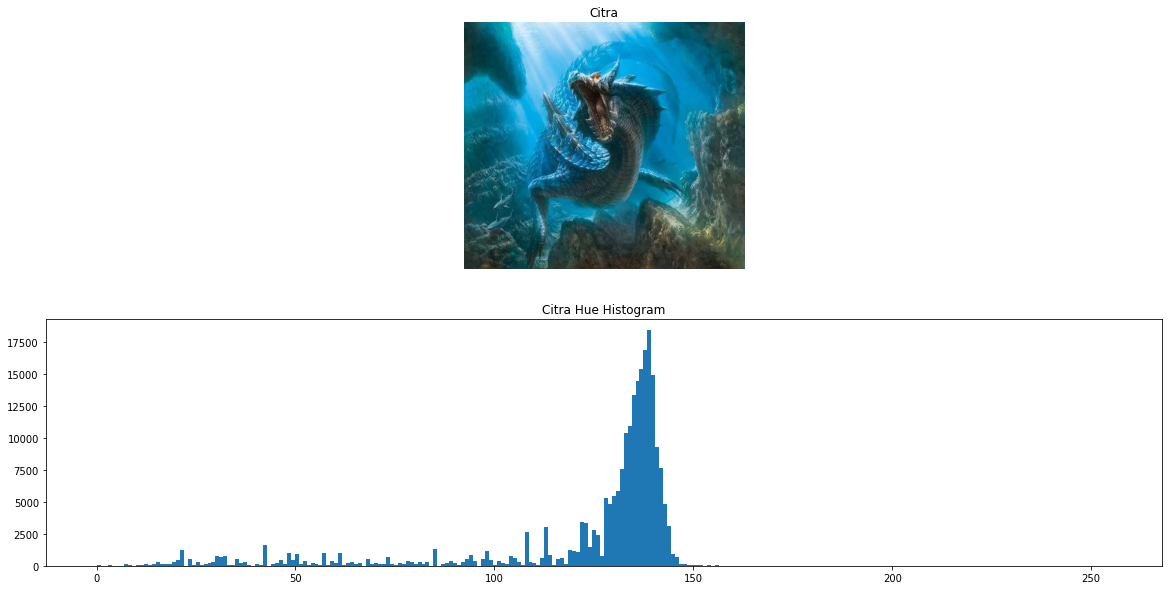

Hasil prediksi: water_dragon


In [195]:
## Interface untuk melakukan prediksi
lokasi_file = input('Masukkan path file (e.g.: water_dragon/2.jpg): ')
print('Hasil prediksi: %s' % (predict_dragon_type(lokasi_file)))

##### b. Menjelaskan penggunaan fitur 

1. Pada saat penggalian _insight_, kami mencoba menelaah untuk mendapatkan informasi sebanyak-banyaknya dengan melakukan plotting histogram berdasarkan channel RGB.
2. Setelah melakukan plotting histogram RGB, kami tidak menemukan perbedaan signifikan pada citra water_dragon maupun fire_dragon terhadap channel R maupun B-nya.
3. Tidak berhenti sampai situ, kami memutuskan untuk menggali _insight_ dengan melihat channel HSV.
4. Setelah melakukan plotting histogram HSV, kami menemukan perbedaan signifikan pada citra water_dragon dengan fire_dragon pada channel Hue-nya.
5. Kami pun melakukan eksperimen terhadap semua data latih yang diberikan asisten.
6. Setelah usai melakukan eksperimen terhadap semua data latih, kami menemukan bahwa untuk citra yang **dominan merah akan memiliki nilai Hue-nya cenderung berkumpul di kiri**. Untuk **dominan biru akan memiliki nilai Hue-nya cenderung berkumpul di tengah**.
7. Setelah melakukan eksperimen pada palet color di suatu aplikasi pengolah citra, kami menemukan bahwa operasi merubah nilai Hue akan menyebabkan transisi dari Merah -> Biru -> Hijau dengan arah merupakan efek perubahan nilai Hue yang diperbesar. 
8. Dari sini kita menemukan hal yang masuk akal kenapa Biru berada di tengah histogram channel Hue bukan pada paling kanan.

2. **[30] Hough Transformation** \
Diberikan dua buah kelas citra yaitu kelas _tic tac toe_ dan juga _sudoku_ yang terdiri dari masing-masing 5 citra untuk kedua kelas.
![tic_tac_toe_2.jpg](Tugas%20Lab%205%20-%20Images/tic_tac_toe/2.png)
![sudoku_1.jpg](Tugas%20Lab%205%20-%20Images/sudoku/1.jpg)
    - [20] Gunakan hasil _hough transformation_ yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan _tic tac toe_ atau _sudoku_.
    - [10] Jelaskan fitur yang telah Anda buat pada bagian pertama dan alasan Anda memilih fitur tersebut!

##### a. Melakukan Tranformasi Hough untuk Citra Input dan Melakukan Prediksi 

In [167]:
## Method predict yang akan digunakan
def predict_game_board_type(file_location, basePath=basePath):
    img = util.img_as_ubyte(io.imread(getPath(file_location, basePath=basePath)))
    
    original_image = np.copy(img)

    ## Convert image to gray
    gray = util.img_as_ubyte(color.rgb2gray(img))

    ## Find all of the edges using Canny
    edges = cv2.Canny(gray, 50, 200, apertureSize=3)

    ## Find all of the lines using Hough Transformation
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    ## Plotting line
    for line in lines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 500 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 500 * a)
            cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

    ## Show image
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('After Hough Transfromation')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    return ['Tic Tac Toe', 'Sudoku'][len(lines) >= 20]

Masukkan path file (e.g.: tic_tac_toe/1.png): tic_tac_toe/1.png


/home/jehiannormansaviero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


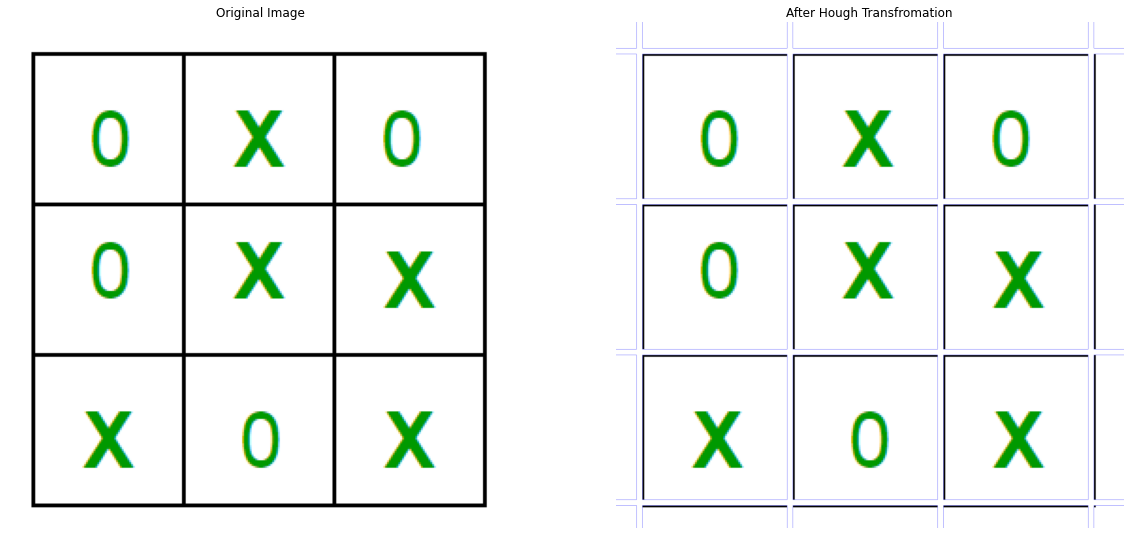

Hasil Prediksi: Tic Tac Toe


In [196]:
## Interface untuk melakukan prediksi
lokasi_file = input('Masukkan path file (e.g.: tic_tac_toe/1.png): ')
print('Hasil Prediksi: ' + predict_game_board_type(lokasi_file))

##### b. Menjelaskan fitur yang telah digunakan

1. Kami melakukan eksperimen terlebih dahulu untuk mendapatkan jumlah garis dan _hyperparameter tuning_ dalam pengujian kali ini.
2. Setelah menemukan parameter yang tepat untuk data latih, kami berhasil menemukan garis-garis yang diinginkan dalam citra.
3. Secara visual, jumlah garis **minimal** untuk membangun $\text{sudoku}$ adalah 20 (10 horizontal dan 10 vertikal), dan jumlah garis **minimal** untuk membangun $\text{tic-tac-toe}$ adalah 4 (2 horizonal dan 2 vertikal).
4. Kasus terburuk pada citra $\text{tic-tac-toe}$ adalah membangun garis lebih dari 1 dan berdekatan dalam sebuah garis tebal. Hal ini ditemukan pada $\text{tic_tac_toe_5.png}$ yang mana dalam sebuah garis tebal ditemukan ada 2 garis berdekatan hasil _hough transformation_.
5. Hasil akhir eksperimen jumlah garis vertikal dan horizontal $\text{sudoku}$ pasti lebih dari 20 dan jumlah garis vertikal dan horizontal $\text{tic-tac-toe}$ pasti lebih dari 4.
6. Dengan demikian untuk klasifikasinya kami hanya perlu menghitung banyak garis lebih dari 20 atau tidak. Kalau lebih dari 20 itu pasti $\text{tic-tac-toe}$, bila tidak berarti $\text{sudoku}$.
7. Klasifikasi ini hanya berlaku kalau citranya hanya $\text{tic-tac-toe}$ atau $\text{sudoku}$ saja, belum dapat digunakan untuk mendeteksi jenis board game lain.

3. **[40] Template Matching** \
DIberikan citra `sayuran.jpg` dan `kol.jpg`.
![sayuran.jpg](Tugas%20Lab%205%20-%20Images/sayuran.jpg)
![sudoku_1.jpg](Tugas%20Lab%205%20-%20Images/kol.jpg)
    - [15] Lakukan dan tampilkan hasil _template matching_ dengan threshold $0.9$, $0.7$, dan $0.5$! Anda bisa menggunakan libray OpenCV/Skimage/lainnya.
    - [15] Berdasarkan eksplorasi di poin sebelumnya, perbedaan apa yang Anda temukan? Bagaimana perbedaan threshold mempengaruhi hasil?
    - [10] Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini?

##### a. Melakukan Template Matching

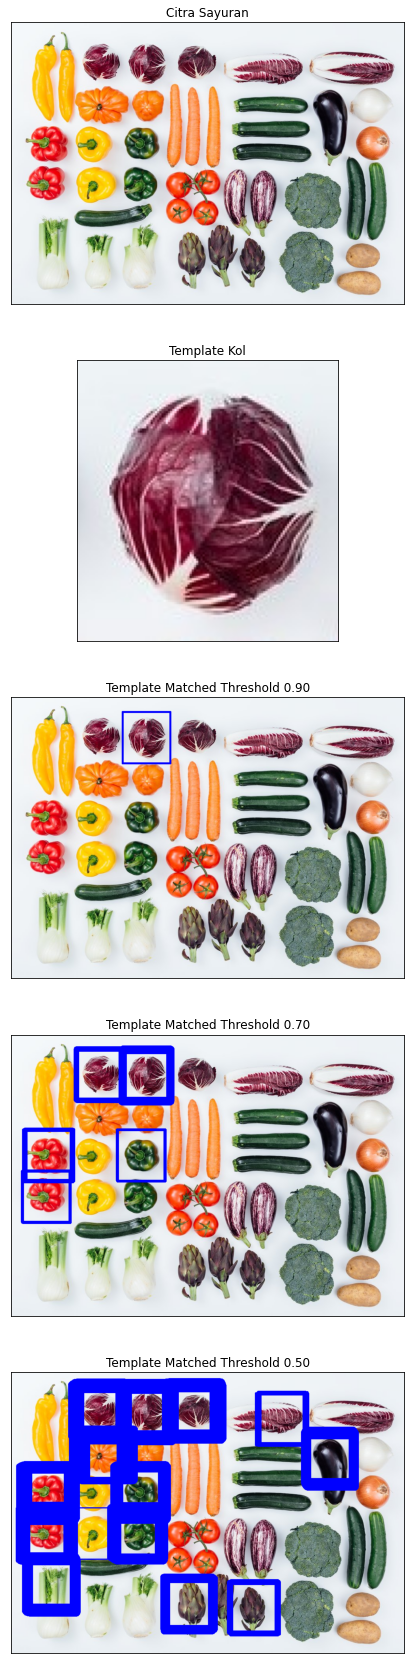

In [194]:
## Import citra yang dibutuhkan
citra_sayuran = cv2.cvtColor(cv2.imread(getPath('sayuran.jpg')), cv2.COLOR_BGR2RGB)
template_kol = cv2.cvtColor(cv2.imread(getPath('kol.jpg')), cv2.COLOR_BGR2RGB)

## Ubah menjadi gray
citra_sayuran_gray = cv2.cvtColor(citra_sayuran, cv2.COLOR_RGB2GRAY)
template_kol_gray = cv2.cvtColor(template_kol, cv2.COLOR_RGB2GRAY)

## Menyimpan width dan height template
w, h = template_kol_gray.shape[::-1]

## Apply template matching
## Parameter ketiga merupakan method, bisa melihat dokumentasi openCV untuk penjelasan lebih lanjut dan pilihan method lainnya
res = cv2.matchTemplate(citra_sayuran_gray, template_kol_gray, cv2.TM_CCOEFF_NORMED)

## Copy citra monas untuk ditandai bounding box
template_matched = citra_sayuran.copy()

## Tentukan threshold
threshold = 0.9
loc = np.where(res >= threshold)

## Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_poing, end_point, color, thickness)
for point in zip(*loc[::-1]):
    cv2.rectangle(template_matched, point, (point[0] + w, point[1] + h), (0,0,255), 2)

## Menampilkan citra
thresholds = [0.9,  0.7, 0.5]

plt.figure(figsize=(30,30))

plt.subplot(len(thresholds)+2,1,1),plt.imshow(citra_sayuran)
plt.title('Citra Sayuran'), plt.xticks([]), plt.yticks([])

plt.subplot(len(thresholds)+2,1,2),plt.imshow(template_kol)
plt.title('Template Kol'), plt.xticks([]), plt.yticks([])

for i in range(len(thresholds)):
    ## Tentukan threshold
    threshold = thresholds[i]
    loc = np.where(res >= threshold)

    ## Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_poing, end_point, color, thickness)
    for point in zip(*loc[::-1]):
        cv2.rectangle(template_matched, point, (point[0] + w, point[1] + h), (0,0,255), 2)

    plt.subplot(len(thresholds)+2,1,3+i),plt.imshow(template_matched)
    plt.title('Template Matched Threshold %.2f' % (threshold)), plt.xticks([]), plt.yticks([])

plt.show()

##### b. Perbedaan yang ditemukan 

- Semakin kecil nilai threshold, semakin kecil akurasinya. Semakin besar threshold semakin besar akurasinya.
- Lalu yang menyebabkan threshold semakin kecil menjadi semakin kecil akurasi adalah ketika threshold diperkecil, maka batas minimal objek itu dideteksi sebagai objek yang diharapkan itu semakin kecil. Hal ini menyebabkan setiap semakin kecil batas bawah, maka objek semakin fleksibel dianggap mirip dan menyebabkan di banyak tempat objek dikatakan mirip

##### c. Kelebihan dan kekurangan Template Matching 

###### Kelebihan
- Dapat mendeteksi objek yang benar-benar ada di dalam citra tersebut dengan akurasi yang tinggi.
- Kita dapat mencari citra yang sesuai dengan bentuk yang diinginkan asal orientasinya sama dengan threshold yang diinginkan.

###### Kekurangan
- Apabila template-nya diubah orientasinya (dirotasi atau diflip), kita bisa saja tidak dapat menemukan objek yang diinginkan pada citra, _vice versa_.